## Importing and prepping data

In [1]:
import pandas as pd
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.pca as pca

In [2]:
features = []
featofvar = 'Type and Serum'

remote_folder = '10_04_18_COOH_PEG_serum' #Folder in AWS S3 containing files to be analyzed
bucket = 'rhodese.data'
vids = 10
types = ['COOH', 'COOH_serum', 'PEG', 'PEG_serum']

counter2 = 0
counter = 0
for typ in types:
    for num in range(1, vids+1):
            try:
                filename = 'features_{}_XY{}.csv'.format(typ, '%02d' % num)
                print(filename)
                aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name=bucket)
                fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
                print('{} size: {}'.format(filename, fstats.shape))
                fstats['Type and Serum'] = pd.Series(fstats.shape[0]*[typ], index=fstats.index)
                if 'serum' in typ:
                    fstats['Serum'] = pd.Series(fstats.shape[0]*['serum'], index=fstats.index)
                else:
                    fstats['Serum'] = pd.Series(fstats.shape[0]*['no serum'], index=fstats.index)
                if 'COOH' in typ:
                    fstats['Type'] = pd.Series(fstats.shape[0]*['COOH'], index=fstats.index)
                else:
                    fstats['Type'] = pd.Series(fstats.shape[0]*['PEG'], index=fstats.index)
                fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
                counter = counter + 1
                if counter == 1:
                    fstats_tot = fstats
                else:
                    fstats_tot = fstats_tot.append(fstats, ignore_index=True)
            except:
                print('Skipped!: {}'.format(filename))
    counter2 = counter2 + 1

features_COOH_XY01.csv
features_COOH_XY01.csv size: (14913, 67)
features_COOH_XY02.csv
features_COOH_XY02.csv size: (14225, 67)
features_COOH_XY03.csv
features_COOH_XY03.csv size: (14767, 67)
features_COOH_XY04.csv
features_COOH_XY04.csv size: (14936, 67)
features_COOH_XY05.csv
features_COOH_XY05.csv size: (15344, 67)
features_COOH_XY06.csv
features_COOH_XY06.csv size: (63173, 67)
features_COOH_XY07.csv
features_COOH_XY07.csv size: (42620, 67)
features_COOH_XY08.csv
features_COOH_XY08.csv size: (43427, 67)
features_COOH_XY09.csv
features_COOH_XY09.csv size: (19220, 67)
features_COOH_XY10.csv
features_COOH_XY10.csv size: (27610, 67)
features_COOH_serum_XY01.csv
features_COOH_serum_XY01.csv size: (42821, 67)
features_COOH_serum_XY02.csv
features_COOH_serum_XY02.csv size: (42778, 67)
features_COOH_serum_XY03.csv
features_COOH_serum_XY03.csv size: (42996, 67)
features_COOH_serum_XY04.csv
features_COOH_serum_XY04.csv size: (43391, 67)
features_COOH_serum_XY05.csv
features_COOH_serum_XY05.cs

In [ ]:
#PCA analyses with too many datapoints fail. You get rows with lots of NAs. I'm going to try making a subset of the data first
#and then do a PCA analysis on that.

#include all in analysis
import random
subset = np.sort(np.array(random.sample(range(fstats_tot.shape[0]), 500000)))
fstats_sub = fstats_tot.loc[subset, :].reset_index(drop=True)

In [ ]:
fstats_tot['Type and Serum'].unique()

In [ ]:
for typ in fstats_tot['Type and Serum'].unique():
    fstats_type = fstats_tot[fstats_tot['Type and Serum']==typ].reset_index(drop=True)
    print(fstats_type.shape)

In [3]:
#with equal sample sizes for each particle type
import random
counter = 0
for typ in fstats_tot['Type and Serum'].unique():
    fstats_type = fstats_tot[fstats_tot['Type and Serum']==typ].reset_index(drop=True)
    print(fstats_type.shape)
    subset = np.sort(np.array(random.sample(range(fstats_type.shape[0]), 50000)))
    if counter == 0:
        fstats_sub = fstats_type.loc[subset, :].reset_index(drop=True)
    else:
        fstats_sub = fstats_sub.append(fstats_type.loc[subset, :].reset_index(drop=True), ignore_index=True)
    counter = counter + 1

(270235, 71)
(383602, 71)
(103955, 71)
(703996, 71)


In [4]:
#fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
nonnum = ['Type and Serum', 'Type', 'Serum', 'Video Number', 'Track_ID', 'Mean Mean_Intensity', 'Std Mean_Intensity', 'X', 'Y',
          'Mean X', 'Mean Y', 'Std X', 'Std Y']
fstats_num = fstats_sub.drop(nonnum, axis=1)
fstats_raw = fstats_num.as_matrix()
#fstats

## PCA analysis

The pca.pca_analysis function provides a completely contained PCA analysis of the input trajectory features dataset. It includes options to impute NaN values (fill in with average values or drop them), and to scale features. Read the docstring for more information. 

In [5]:
ncomp = 14
pcadataset = pca.pca_analysis(fstats_tot, dropcols=nonnum, n_components=ncomp)

Cumulative explained variance:
0 component: 0.18614031038465492
1 component: 0.295927021716838
2 component: 0.3992889227536503
3 component: 0.4852893749756521
4 component: 0.533348373264827
5 component: 0.5777568129400004
6 component: 0.6170165574054646
7 component: 0.6554888872375112
8 component: 0.6890849177241402
9 component: 0.7151250277398422
10 component: 0.7391723181643802
11 component: 0.7630689835984799
12 component: 0.7830563517937866
13 component: 0.8020905836230195


In [ ]:
pcadataset.components.to_csv('components.csv')

In [ ]:
fstats_num.columns

In [ ]:
pcadataset.prcomps

The pca.kmo function calculates the Kaiser-Meyer-Olkin statistic, a measure of sampling adequacy. Check the docstring for more information.

In [ ]:
kmostat = pca.kmo(pcadataset.scaled)

## Visualization

Users can then compare average principle component values between subgroups of the data. In this case, all particles were taken from the same sample, so there are no experimental subgroups. I chose to compare short trajectories to long trajectories, as I would expect differences between the two groups.

In [ ]:
import numpy as np
featofvar = 'Type and Serum'
#ncomp = 14
dicti = {}
#test = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==200].as_matrix()), axis=0))[-6:]
#test1 = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==500].as_matrix()), axis=0))[-6:]
dicti[0] = np.nanmean(pcadataset.final[pcadataset.final[featofvar]=='COOH'].values[:, -ncomp:], axis=0)
dicti[1] = np.nanmean(pcadataset.final[pcadataset.final[featofvar]=='COOH_serum'].values[:, -ncomp:], axis=0)
dicti[2] = np.nanmean(pcadataset.final[pcadataset.final[featofvar]=='PEG'].values[:, -ncomp:], axis=0)
dicti[3] = np.nanmean(pcadataset.final[pcadataset.final[featofvar]=='PEG_serum'].values[:, -ncomp:], axis=0)

In [ ]:
labels = ['COOH', 'COOH_serum', 'PEG', 'PEG_serum']
pca.plot_pca(dicti, savefig=True, labels=labels, rticks=np.linspace(-4, 4, 9))

The variable pcadataset.prcomps shows the user the major contributions to each of the new principle components. When observing the graph above, users can see that there are some differences between short trajectories and long trajectories in component 0 (asymmetry1 being the major contributor) and component 1 (elongation being the major contributor).

In [ ]:
#labels=['10K', '5K', '1K', 'COOH']
feats = pca.feature_violin(pcadataset.final, label=featofvar, lvals=labels, fsubset=ncomp, yrange=[-12, 12])

In [ ]:
fstats1 = pca.feature_plot_3D(pcadataset.final, label=featofvar, lvals=labels, randcount=400, ylim=[-12, 12],
                              xlim=[-12, 12], zlim=[-12, 12], features=[0, 2, 3])

In [ ]:
fstats1 = pca.feature_plot_3D(pcadataset.final, label='Serum', lvals=['serum', 'no serum'], randcount=800, ylim=[-12, 12],
                              xlim=[-12, 12], zlim=[-12, 12], features=[0, 2, 3])

In [ ]:
fstats1 = pca.feature_plot_3D(pcadataset.final, label='Type', lvals=['COOH', 'PEG'], randcount=800, ylim=[-12, 12],
                              xlim=[-12, 12], zlim=[-12, 12], features=[0, 2, 3])

In [ ]:
#ncomp = 14
trainp = np.array([])
testp = np.array([])
labels3 = ['COOH', 'PEG']
labels = ['COOH', 'COOH_serum', 'PEG', 'PEG_serum']

for i in range(0, 3):
    KNNmod, X, y = pca.build_model(pcadataset.final, featofvar, labels, equal_sampling=True,
                                       tsize=2000, input_cols=ncomp, model='MLP', NNhidden_layer=(6, 5, 3))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final[featofvar].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    print('Run {}: {}'.format(i, testp[i]))

In [38]:
#ncomp = 14
trainp = np.array([])
testp = np.array([])
labels3 = ['COOH', 'PEG']
labels = ['COOH', 'COOH_serum', 'PEG', 'PEG_serum']

for i in range(0, 5):
    KNNmod, X, y = pca.build_model(pcadataset.final, featofvar, labels, equal_sampling=True,
                                       tsize=2000, input_cols=ncomp, model='MLP', NNhidden_layer=(6, 5, 3))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final[featofvar].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    print('Run {}: {}'.format(i, testp[i]))

Run 0: 0.9616476534217
Run 1: 0.9664595686925874
Run 2: 0.9648970986216879
Run 3: 0.9556782515658906
Run 4: 0.9629159631902848


In [7]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.95425 +/ 0.004246321937865763
0.9657750645100384 +/ 0.00220879826406041


In [ ]:
ypred = pd.Series(KNNmod.predict(X2)).str.split('_', expand=True)

In [ ]:
ya = np.copy(yact[0].values)
ya[ya == 'COOH'] = 1
ya[ya != 1] = 0

yp = np.copy(ypred[0].values)
yp[yp == 'COOH'] = 1
yp[yp != 1] = 0

In [ ]:
from sklearn import metrics

def mod_roc_curve(y_true, y_score, pos_label):
    ya = np.copy(y_true)
    ya[ya == pos_label] = 1
    ya[ya != 1] = 0

    yp = np.copy(y_score)
    yp[yp == pos_label] = 1
    yp[yp != 1] = 0
    
    fpr, tpr, thresholds = metrics.roc_curve(ya, yp, drop_intermediate=False)
    return fpr, tpr, thresholds

In [ ]:
fpr, tpr, thresholds = mod_roc_curve(yact[1].values, ypred[1].values, pos_label=None)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(fpr, tpr)

In [ ]:
plt.plot(fpr, tpr)

In [ ]:
plt.plot(fpr, tpr)

In [ ]:
plt.plot(fpr, tpr)

In [ ]:
yr1 = np.random.randint(0, 2, size=400)
yr2 = np.random.rand(400)
fpr, tpr, thresholds = metrics.roc_curve(yr1, yr2)
plt.plot(fpr, tpr)

In [ ]:
noise = 10
size = 400
yr1 = np.random.randint(0, 2, size=size)
yr2 = yr1 + noise*np.random.rand(size) - 0.5*noise
fpr, tpr, thresholds = metrics.roc_curve(yr1, yr2)
plt.plot(fpr, tpr)

In [ ]:
noise = 5
size = 400
yr1 = np.random.randint(0, 2, size=size)
yr2 = yr1 + noise*np.random.rand(size) - 0.5*noise
fpr, tpr, thresholds = metrics.roc_curve(yr1, yr2)
plt.plot(fpr, tpr)

In [ ]:
noise = 2.5
size = 400
yr1 = np.random.randint(0, 2, size=size)
yr2 = yr1 + noise*np.random.rand(size) - 0.5*noise
fpr, tpr, thresholds = metrics.roc_curve(yr1, yr2)
plt.plot(fpr, tpr)

In [ ]:
noise = 1.5
size = 400
yr1 = np.random.randint(0, 2, size=size)
yr2 = yr1 + noise*np.random.rand(size) - 0.5*noise
fpr, tpr, thresholds = metrics.roc_curve(yr1, yr2)
plt.plot(fpr, tpr)

In [ ]:
KNNmod.score(X2, y2)

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn import metrics

In [47]:
ynew = label_binarize(y, classes=labels)
y2new = label_binarize(y2, classes=labels)
n_classes = ynew.shape[1]

In [41]:
ynew

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ..., 
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [42]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))

In [59]:
y_score = classifier.fit(X, ynew).decision_function(X2)

In [92]:
y_scorep = pd.DataFrame(data=y_score.transpose()).idxmax()
y2newp = pd.DataFrame(data=y2new.transpose()).idxmax()

In [93]:
ycorrect = y_scorep == y2newp

In [96]:
ycorrect.mean()

0.93548380476512327

In [60]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y2new[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y2new.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

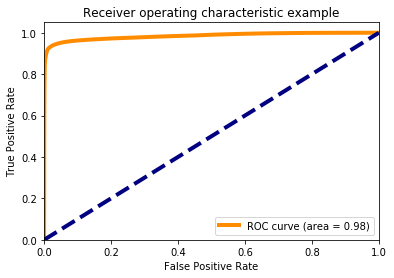

In [83]:
tclass = 0
plt.figure()
lw = 4
plt.plot(fpr[tclass], tpr[tclass], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[tclass])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [62]:
classifier.score(X2, y2new)

0.78536217290058474

In [74]:
roc_auc[0]*roc_auc[1]*roc_auc[2]*roc_auc[3]

0.89429141285438341

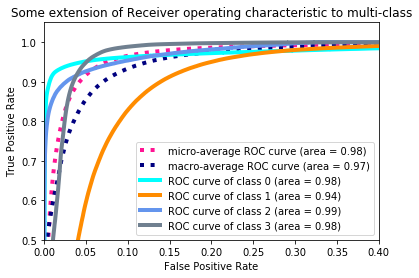

In [84]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'slategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0, 0.4])
plt.ylim([0.5, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")

I found a standard way of implementing ROC curves with non-binary data called the one versus all method. It essentially breaks a n-class system into n-1 binary systems, and you make an n-1 roc curves for each case. I can't use MLP methods this way, but it looks like I can get high predictive power as-is? Kind of? I can get 

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y, y_score)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [26]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [29]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [30]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [ ]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

In [ ]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])